In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.2.0


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-01 14:53:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.84MB/s    in 61s     

2020-07-01 14:54:14 (5.02 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# melakukan ekstraksi pada file zip
import zipfile
import os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
# melihat isi dari directory
os.listdir('/tmp/rockpaperscissors/')

['rps-cv-images', 'scissors', 'paper', 'README_rpc-cv-images.txt', 'rock']

In [6]:
# membuat directory train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [7]:
# mengetahui isi file di directory
os.listdir('/tmp/rockpaperscissors/') 

['validation',
 'train',
 'rps-cv-images',
 'scissors',
 'paper',
 'README_rpc-cv-images.txt',
 'rock']

In [8]:
# membuat direktori rock, paper, scissors pada direktori data training dan data validation
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

validation_rock = os.path.join(validation_dir, 'rock')
validation_paper = os.path.join(validation_dir, 'paper')
validation_scissors = os.path.join(validation_dir, 'scissors')

In [9]:
# membuat directory baru di dalam directory data train dan validation
try:
  os.mkdir(train_rock)
  os.mkdir(train_paper)
  os.mkdir(train_scissors)
  os.mkdir(validation_rock)
  os.mkdir(validation_paper)
  os.mkdir(validation_scissors)
except OSError:
    pass

In [10]:
# membagi directory rock, paper, scissors menjadi data train dan validation
from sklearn.model_selection import train_test_split
train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.1)
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.1)
train_scissors_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.1)

In [11]:
# copy data train dan data validation ke dalam new directory yang telah dibuat
import shutil
 
for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))
 
for i in validation_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(validation_rock,i))
for i in validation_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(validation_paper,i))
for i in validation_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(validation_scissors,i))

In [12]:
# meihat data di directory train
os.listdir('/tmp/rockpaperscissors/train/')

['scissors', 'paper', 'rock']

In [13]:
# melihat data di directory validation
os.listdir('/tmp/rockpaperscissors/validation/')

['scissors', 'paper', 'rock']

In [14]:
for i in ['scissors', 'rock', 'paper']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('../tmp/rockpaperscissors/train/'+i+'/'))))

Training scissors images are: 675
Training rock images are: 653
Training paper images are: 640


In [15]:
for i in ['scissors', 'rock', 'paper']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('../tmp/rockpaperscissors/train/'+i+'/'))))

Valid scissors images are: 675
Valid rock images are: 653
Valid paper images are: 640


In [16]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [17]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # directory data training
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='categorical') # klasifikasi multi kelas maka menggunakan class_mode = 'categorical'

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # directory data validation
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        class_mode='categorical') # klasifikasi multi kelas maka menggunakan class_mode = 'categorical'

Found 1968 images belonging to 3 classes.
Found 220 images belonging to 3 classes.


In [22]:
# membuat model sequential
model = tf.keras.models.Sequential([
    # konvolusi pertama                                
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu', input_shape= (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # konvolusi kedua
    tf.keras.layers.Conv2D(64,(3,3), padding='same', activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # konvolusi ketiga
    tf.keras.layers.Conv2D(128,(3,3), padding='same', activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # konvolusi keempat
    tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dense(3, activation= 'softmax') # fungsi multi kelas
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=35,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=50,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validation
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

model.save("rockpaperscissors.h5")

Epoch 1/50
35/35 - 2s - loss: 1.2532 - accuracy: 0.3429 - val_loss: 1.1031 - val_accuracy: 0.3500
Epoch 2/50
35/35 - 2s - loss: 1.1029 - accuracy: 0.3286 - val_loss: 1.0979 - val_accuracy: 0.3500
Epoch 3/50
35/35 - 2s - loss: 1.0939 - accuracy: 0.3786 - val_loss: 1.0952 - val_accuracy: 0.3500
Epoch 4/50
35/35 - 2s - loss: 1.0146 - accuracy: 0.4857 - val_loss: 0.9217 - val_accuracy: 0.6000
Epoch 5/50
35/35 - 2s - loss: 0.9754 - accuracy: 0.6000 - val_loss: 0.8567 - val_accuracy: 0.8000
Epoch 6/50
35/35 - 2s - loss: 0.7242 - accuracy: 0.6857 - val_loss: 0.6177 - val_accuracy: 0.6500
Epoch 7/50
35/35 - 2s - loss: 0.3697 - accuracy: 0.8429 - val_loss: 0.6525 - val_accuracy: 0.8000
Epoch 8/50
35/35 - 2s - loss: 0.4802 - accuracy: 0.8429 - val_loss: 0.2944 - val_accuracy: 0.9500
Epoch 9/50
35/35 - 2s - loss: 0.3339 - accuracy: 0.8929 - val_loss: 0.4466 - val_accuracy: 0.8500
Epoch 10/50
35/35 - 2s - loss: 0.2998 - accuracy: 0.8857 - val_loss: 0.2883 - val_accuracy: 0.8500
Epoch 11/50
35/35 -

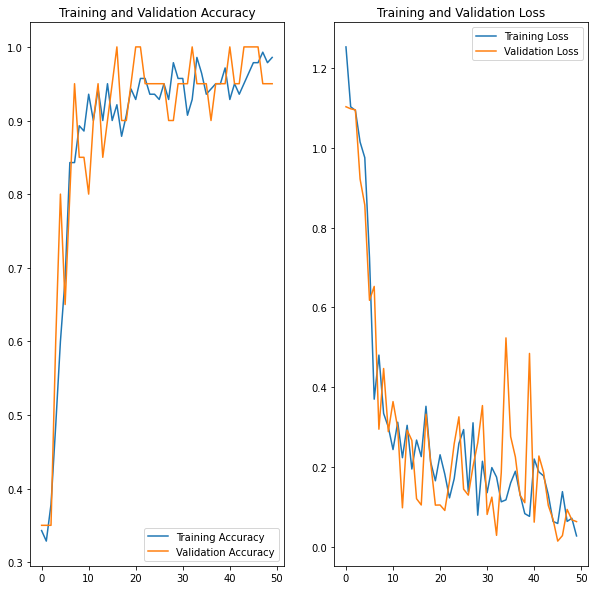

In [24]:
# melihat plot accuracy dan loss
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


Saving 1jHtb93pI8f6pfKo.png to 1jHtb93pI8f6pfKo.png
1jHtb93pI8f6pfKo.png
paper


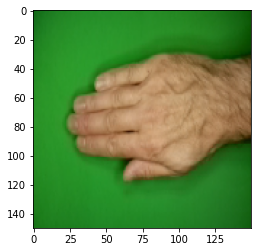

In [33]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)
  
  print(fn)
  if classes[0,1]!=0:
    print('rock')
  elif classes[0,0]!=0:
    print('paper')
  else:
    print('scissors')

Saving ZPRYcDY3SAyZigkB.png to ZPRYcDY3SAyZigkB.png
ZPRYcDY3SAyZigkB.png
rock


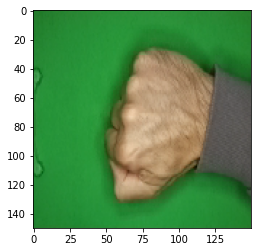

In [34]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)
  
  print(fn)
  if classes[0,1]!=0:
    print('rock')
  elif classes[0,0]!=0:
    print('paper')
  else:
    print('scissors')

Saving 8ei3rSl89D6W8Tav.png to 8ei3rSl89D6W8Tav.png
8ei3rSl89D6W8Tav.png
scissors


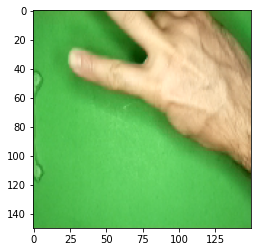

In [36]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=4)
  
  print(fn)
  if classes[0,1]!=0:
    print('rock')
  elif classes[0,0]!=0:
    print('paper')
  else:
    print('scissors')